<h1> The Battle of the Neighborhoods (Week 2) </h1>
<h4> Applied Data Science capstone by IBM/Coursera </h4>

<h3> Table of Content </h3>

<ol>
<li>Introduction: Bussiness problem</li>
<li>Data</li>
<li>Methodology</li>
<li>Analysis</li>
<li>Result and Discussion</li>
<li>Conclusion</li>
</ol>

## Introduction: Business Problem

This project aims to get a best location for a bookshop in the state of New York, United States of America (USA). The bookshop 
is to be located in any of the counties in New York and will be accessed by the public and students.  

There is therefore the choice of which county in New York is best suitable for locating the bookshoop?. To fetch answer to this question will require
1. location inofrmation on existing bookshops and bussiness types that offer similar services. 
2. Population information of student and public commnunity in the neighborhood Boroughs
3. Mapping the location of the Univeristies within the Neigborhood
4. Evaluation of how good existing bookshop serves the student and public population 

### Libraries and related informations

The information required for foursquare search are the <b> personal and the query data</b>. My personal detail is accessed 
from a txt file for confidential reasons. The query serach information on <b> LIMIT and radius </b> will be varied to determine 
the number of existing bookshops that is located close to selected university within each county of New York. The two 
data will therefore be inputted. Locations with <b>lowest number of bookshop, high student and urban population </b> will 
be favored. 

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
# websites
# https://www.youtube.com/watch?v=clP6W7W79MM
# https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/

#### Personal details

In [3]:
file = open("Details.txt","r")
lines = file.readlines()
CLIENT_ID = lines[0]
CLIENT_SECRET = lines[1]
ACCESS_TOKEN = lines[2]
print('user input')

user input


My personal details includes my client identification, secret number and access token. These infromation where read from a text 
file for confidentiality purposes. 

#### Search query and serach query

In [4]:
VERSION = '20180604'
search_query = 'bookshop'
LIMIT = 30
print(search_query + ' .... OK!')

bookshop .... OK!


The verion and search query are neccessary input. The vserion gives the latest date for update information and the search query 
specifis the search item being sort for. in this case, we are looking for bookshops in the neigborhood of a univserity. The 
limit provides the upper limit bound for lenght of data that will be returned

#### The bookshop 

The Bookshop will be located at close proximity to any of the three listed univsersities in New York. These are universities 
with high academic rating, with high percentage of student enrollment. This preview is based on information form Laura (2021)

Laura (2021) [Top New York Uni](https://www.topuniversities.com/where-to-study/north-america/united-states/top-universities-new-york-city)
listed to uinversities in New York. Three of the listed universities were selected (based on student admission) is shown below:
    
1. New York University with a population of 51,123 [New York Uni]( https://www.forbes.com/colleges/new-york-university/?sh=df29c575de64)
2. City University of New York with a population 274,000 [City Uni](https://en.wikipedia.org/wiki/The_New_School)
3. Columbia University with a population of 33,143 [Columbia Uni](https://en.wikipedia.org/wiki/Columbia_University)

### Histogram showing the population of student from the three universities. 

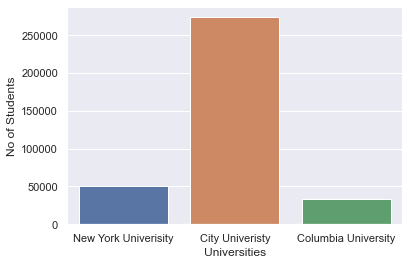

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import seaborn as sns
 
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Creating distribution
df = pd.DataFrame({"Universities":["New York Univerisity", "City Univeristy", "Columbia University"], "No of Students": [51123, 274000, 33143]})

sns.barplot(x = 'Universities',
            y = 'No of Students',
            data = df)
 
# Show the plot
plt.show()

From the above plot City University has the highest student population with over 25 different campuses. The other two univeristies
have a single a dual campus.

### To search for book shops around the location of New York University

In this section, a search for 

1. Nearby bookshops in around these three univseristies at radius of 1 kilometer. This required to access the density i.e number of bookshop per student within the specified radius of 1 Kilometer.
2. Location of urban cities near the different univeristies since the bookshop will also serve the public intrest
3. Exploartion of the urban areas to get tips of activities in those areas

## First: Search for existing bookshops around New York Univeristy

#### The cordinates of New york Univerisity

In [6]:
address = 'New York University, New York, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.72925325 -73.99625393609625


#### To check if bookshop exist at a specified radius

In [7]:
# Input the radius
radius = int(input("The radius: "))
New_york_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

# The get request to get the results 
results = requests.get(New_york_url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
new_York_df = json_normalize(venues)

print()

# use the if statement to check if the dataframe is empty
if new_York_df.empty != True:
    print("Dataframe is avaliable")  # If not empty print "Data is avaliable" else 
else:
    print("Data is not avaliable") 
print()
print('The number of bookshops at radius {}, is {}.'.format(radius,len(new_York_df)))

The radius: 20000

Dataframe is avaliable

The number of bookshops at radius 20000, is 23.


<ipython-input-7-b80d3a8cceca>:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  new_York_df = json_normalize(venues)


#### Information of five bookshops are avaliable at a radius of 1 kilometer from New York University

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in new_York_df.columns if col.startswith('location.')] + ['id']
dataframe_filtered = new_York_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered
# Created a filtered dataframe
dfNY_filtered = pd.DataFrame({'Categories':dataframe_filtered['categories'], 'Address':dataframe_filtered['location.formattedAddress'], 'Latitude':dataframe_filtered['location.lat'], 
                            'Longitude':dataframe_filtered['location.lng'], 'Distance':dataframe_filtered['location.distance'], 'Id':dataframe_filtered.id})

# To sort the dataframe using the distance columns
dfNY_filtered = dfNY_filtered.sort_values(['Distance'], ascending = True)

# To reset the index.
dfNY_filtered.reset_index(drop=True, inplace=True)
dfNY_filtered.head()

,Categories,Address,Latitude,Longitude,Distance,Id
0,Bookstore,"[2 Bond St, New York, NY 10012, United States]",40.727093,-73.994507,282,5d34cf093fa42a0008f48aac
1,Bookstore,"[80 E 11th St, New York, NY 10003, United States]",40.730514,-73.992073,379,5259787611d240f393e1a3f1
2,Bookstore,"[122 4th Ave (btwn 11th and 12th St), New York...",40.733046,-73.990017,674,3fd66200f964a520b4e41ee3
3,Bookstore,"[2 W 14th St (at 5th Avenue), New York, NY 100...",40.736116,-73.993895,789,4cfade2234c1a0932beb420e
4,Miscellaneous Shop,"[226 E 14th St, New York, NY 10003, United Sta...",40.732805,-73.986100,943,566bcdc0498eba26c2082fb2


In [9]:
dataframe_filtered.columns

Index(['name', 'categories', 'location.address', 'location.crossStreet',
       'location.lat', 'location.lng', 'location.labeledLatLngs',
       'location.distance', 'location.postalCode', 'location.cc',
       'location.neighborhood', 'location.city', 'location.state',
       'location.country', 'location.formattedAddress', 'id'],
      dtype='object')

## Search for bookshops around the City College of New York, America

#### The cordinate of City College of New York, America

In [10]:
address = 'City college, New York, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.81819805 -73.95100897933364


#### To check if there is a dataframe at a specified radius

In [11]:
# Input the radius
radius = int(input("The radius"))
City_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

# The get request to get the results 
results = requests.get(City_url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']


# tranform venues into a dataframe
City_df = json_normalize(venues)

# use the if statement to check if the dataframe is empty
if City_df.empty != True:
    print("Dataframe is avaliable")  # If not empty print "Data is avaliable" else 
else:
    print("Data is not avaliable")   
print()
print('The number of bookshops at radius {}, is {}.'.format(radius,len(City_df)))

The radius20000
Dataframe is avaliable

The number of bookshops at radius 20000, is 26.


<ipython-input-11-06aebb7c923d>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  City_df = json_normalize(venues)


This three set of bookshops were located at a distance of 5 kilometer from the university. This is different from what was 
obtained in the New York Univsersity. The bookshops are not close to the univserisity, reason for this may be city planning 
regulation

In [12]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in City_df.columns if col.startswith('location.')] + ['id']
dataframe_filtered = City_df.loc[:, filtered_columns]

# function that extracts the category of the venue
# function that extracts the category of the venue
for i, row in City_df.iterrows():
    dataframe_filtered['categories'] = row['categories'][0]['name']

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

# Created a filtered dataframe
dfCY_filtered = pd.DataFrame({'Categories':dataframe_filtered.categories, 'Address':dataframe_filtered.formattedAddress, 'Latitude':dataframe_filtered.lat, 
                            'Longitude':dataframe_filtered.lng, 'Distance':dataframe_filtered.distance, 'Id':dataframe_filtered.id})

# To sort the dataframe using the distance columns
dfCY_filtered = dfCY_filtered.sort_values(['Distance'], ascending = True)

# To reset the index.
dfCY_filtered.reset_index(drop=True, inplace=True)
dfCY_filtered.head()

,Categories,Address,Latitude,Longitude,Distance,Id
0,Bookstore,"[2113 Amsterdam Ave (165 street), New York, NY...",40.837839,-73.938292,2434,4dfe3f6bd4c01dccaebd615a
1,Bookstore,"[31-29 31st St (btwn Broadway & 31st Ave), Ast...",40.763460,-73.923813,6510,51b25659498e4fcf97aaa3e2
2,Bookstore,"[PO Box 104, New York, NY 10150, United States]",40.757855,-73.969188,6889,52350db67e481201910e7ef8
3,Bookstore,"[240 E 53rd St (3rd Ave.), New York, NY 10022,...",40.757085,-73.967981,6951,4b95852ef964a5203fa734e3
4,Bookstore,"[UN Headquarters, New York, NY 10017, United S...",40.750634,-73.967345,7646,4cdc3a9d22bd721ede06fa47


The bookshop at closest proximity to the university is at distance of approximately 3882 meters to the univeristy 
(roughly 3mins drive at 60 kilometer per hour without stopping). This may get to five minutes if stops are included. 

## To search for book shops around the location of Columbia University

#### The cordinate of Columbia University, New York, USA

In [13]:
address = 'Columbia University, New York, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.8077627 -73.96164061324416


In [14]:
# Input the radius
radius = int(input("The radius"))
Columbia_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

# The get request to get the results 
results = requests.get(Columbia_url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']


# tranform venues into a dataframe
Columbia_df = json_normalize(venues)

# use the if statement to check if the dataframe is empty
if Columbia_df.empty != True:
    print("Dataframe is avaliable")  # If not empty print "Data is avaliable" else 
else:
    print("Data is not avaliable")
print()

print('The number of bookshops at radius {}, is {}.'.format(radius,len(Columbia_df)))

The radius20000
Dataframe is avaliable

The number of bookshops at radius 20000, is 26.


<ipython-input-14-9a42e42f5d25>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  Columbia_df = json_normalize(venues)


In [15]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in Columbia_df.columns if col.startswith('location.')] + ['id']
dataframe_filtered = Columbia_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered
# Created a filtered dataframe
dfCA_filtered = pd.DataFrame({'Categories':dataframe_filtered['categories'], 'Address':dataframe_filtered['location.formattedAddress'], 'Latitude':dataframe_filtered['location.lat'], 
                            'Longitude':dataframe_filtered['location.lng'], 'Distance':dataframe_filtered['location.distance'], 'Id':dataframe_filtered.id})

# To sort the dataframe using the distance columns
dfCA_filtered = dfCA_filtered.sort_values(['Distance'], ascending = True)

# To reset the index.
dfCA_filtered.reset_index(drop=True, inplace=True)
dfCA_filtered.head()

,Categories,Address,Latitude,Longitude,Distance,Id
0,Bookstore,"[2113 Amsterdam Ave (165 street), New York, NY...",40.837839,-73.938292,3882,4dfe3f6bd4c01dccaebd615a
1,Bookstore,"[PO Box 104, New York, NY 10150, United States]",40.757855,-73.969188,5591,52350db67e481201910e7ef8
2,Bookstore,"[240 E 53rd St (3rd Ave.), New York, NY 10022,...",40.757085,-73.967981,5666,4b95852ef964a5203fa734e3
3,Bookstore,"[31-29 31st St (btwn Broadway & 31st Ave), Ast...",40.763460,-73.923813,5872,51b25659498e4fcf97aaa3e2
4,Bookstore,"[266 W 39th St (8th Avenue), New York, NY 1001...",40.755022,-73.990638,6359,60c2128616af4714dbf7d9b6


### Line plot of distance radius (m) against no of avavliable bookshops

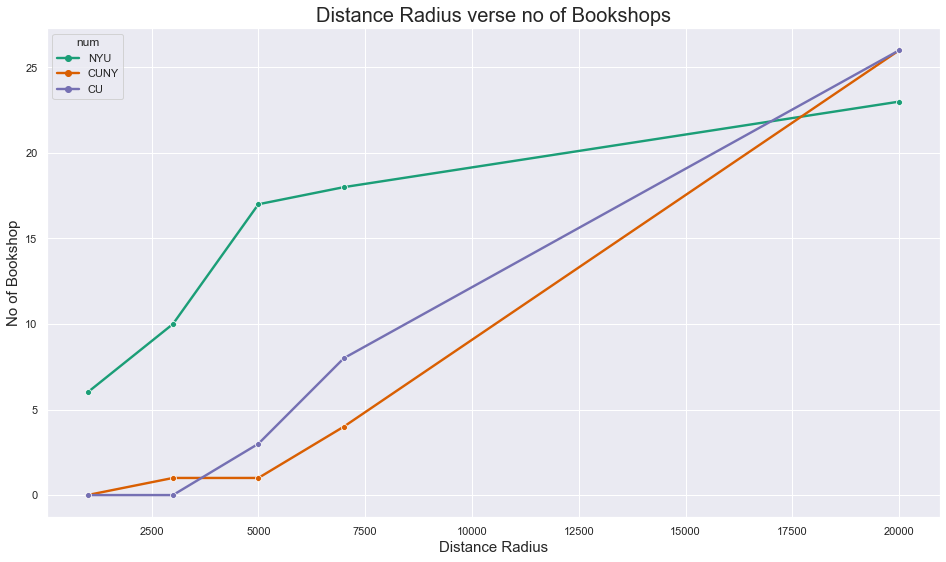

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import seaborn as sns
df = pd.DataFrame({"num":['NYU','NYU','NYU','NYU','NYU','CUNY','CUNY','CUNY','CUNY','CUNY','CU','CU','CU','CU','CU'], "Radius":[20000,7000,5000,3000,1000,20000,7000,5000,3000,1000,20000,7000,5000,3000,1000], "No of Bookshops": [23,18,17,10,6,26,4,1,1,0,26,8,3,0,0]})

plt.figure(figsize = (16,9)) # figure size with ratio 16:9
sns.set(style='darkgrid', rc={"lines.linewidth": 2.4}) # background darkgrid style of graph 
 
# Draw line plot of size and total_bill with parameters
sns.lineplot(x = "Radius", y = "No of Bookshops", data = df, hue = "num",
            style = "num", palette = "Dark2", dashes = False, markers = ["o", "o", "o"],
            legend="brief")
 
plt.title("Distance Radius verse no of Bookshops", fontsize = 20)
plt.xlabel("Distance Radius", fontsize = 15)
plt.ylabel("No of Bookshop", fontsize = 15)
plt.show()

### Summary of information from this search of existing bookshops around the three univeristies 

#### The plots

The plots shows that for:
1. New York University has higher number of bookshops at close radius
2. City University New Yrok and columbia university has the same number of bookshops at 20000 meters i.e the maxium distnace 
considered, and that most bookshops ariund this two universities ar located at far distance from the campuses.
3. City University has 25 campuses scattered over the entire 5 boroughs of New York and therefore needful needful to increase the 
radius of offset tp 20000 meters so to capture most of her campuses.

#### The search result

The search result shows that 
1. The same type and number of bookshops exist between City University and Dorminion University
2. The first 5 close existing bookshops at close proximity to the New York University are at distance of 283, 379, 674, 789, 943
3. The first 5 close existing bookshops at close proximity to the City University are at distance of 2434, 6510, 6889,6951, 7646
4. The first 5 close existing bookshops at close proximiity to the Columbia University are at distnace of 3882, 5591, 5666, 5872, 6359

#### Keynote

New York University have enough bookshops at close proximity to the univeristy. Since our intrest is to get the best
location for a new bookshop, these existing bookshop provides competition and therefor needful to get tips on their ratings

## Population, and income infromation on New York

#### The Manhattan Popluation statistics

This is vital since preliminary investigation indicates that the three univeristies all have their main campus in Manhanttan Borough

In [17]:
# To read the file
df = pd.read_csv('nyc_census_tracts.csv')
manhattan_census_data = df[df['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_census_data.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36061000100,New York,Manhattan,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36061000201,New York,Manhattan,2791,1301,1490,35.3,12.4,6.2,0.0,...,28.2,6.3,1.7,33.0,1105,90.1,7.1,2.8,0.0,2.6
2,36061000202,New York,Manhattan,7768,3314,4454,36.8,17.6,12.8,0.0,...,29.7,9.1,7.0,30.9,2667,74.1,19.8,6.1,0.0,15.1
3,36061000500,New York,Manhattan,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,36061000600,New York,Manhattan,12554,5966,6588,33.2,3.4,12.0,0.4,...,37.6,5.1,2.9,30.3,4028,85.0,10.2,4.8,0.0,8.7


In [18]:
# To create a new colum that contains the percentage of employed people
manhattan_census_data['PerEmployed'] = (manhattan_census_data['Employed']/manhattan_census_data['TotalPop'])*100

print("Summary statistics for Manhanttan")
print("")
# To get the total population of people in Mahanttan 
New_York_total = df['TotalPop'].sum()
ManPop = manhattan_census_data['TotalPop'].sum()
PerManhanttan = (manhattan_census_data['TotalPop'].sum()/df['TotalPop'].sum())*100
manhattan_employed = manhattan_census_data['Employed'].sum()
print("1. There is a total poulation of {} people in Manhanttan which is {} % of New York Population.".format(ManPop, PerManhanttan))

# The average percentage of employed people. This population excludes student below the working age
print("2. There is {} employed people in manhanttan which is {} % of the total population.".format(manhattan_employed, manhattan_census_data.describe().loc['mean','PerEmployed']))

# To get the population of Male and female in Manhattan Borough
manhattan_male = manhattan_census_data['Men'].sum()
manhattan_femmale = manhattan_census_data['Women'].sum()
print("3. The poulation of males and females in Manhattan Borough are {}, {}.".format(manhattan_male, manhattan_femmale))

# The poverty rate
print("4. The poverty rate in Manhanttan is {}. This is lower than New York state average of 18.9%.".format(manhattan_census_data.describe().loc['mean','Poverty']))


# The average income per cap in Manhanttan Borough. 
print("5. The average income per capital in Manhanttan is {} dollars. This is higher than the median income of New York ". format(manhattan_census_data.describe().loc['mean','IncomePerCap']))

# The average unemployment rate in Mahanttan Borough
print("6. The average unemployment rate in Mahnattan Borough is {} %, lower than New Rate of 8.2 at April 2021.".format(manhattan_census_data.describe().loc['mean','Unemployment']))


# To get the summary statistics of the population infromation
manhattan_census_data.describe()


Summary statistics for Manhanttan

1. There is a total poulation of 1629507 people in Manhanttan which is 19.337328787646662 % of New York Population.
2. There is 884457 employed people in manhanttan which is 54.086694265170856 % of the total population.
3. The poulation of males and females in Manhattan Borough are 769434, 860073.
4. The poverty rate in Manhanttan is 17.842907801418434. This is lower than New York state average of 18.9%.
5. The average income per capital in Manhanttan is 69351.51957295374 dollars. This is higher than the median income of New York 
6. The average unemployment rate in Mahnattan Borough is 8.004609929078011 %, lower than New Rate of 8.2 at April 2021.


,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,PerEmployed
count,2.880000e+02,288.000000,288.000000,288.000000,283.000000,283.000000,283.000000,283.000000,283.000000,288.000000,...,281.000000,281.000000,279.000000,288.000000,281.000000,281.000000,281.000000,281.000000,282.000000,283.000000
mean,3.606101e+10,5658.010417,2671.645833,2986.364583,22.646290,48.193993,13.878092,0.224382,12.226502,4017.138889,...,5.266192,7.216014,30.750896,3071.031250,83.258719,8.814235,7.761922,0.165125,8.004610,54.086694
std,8.313542e+03,3178.178642,1476.605538,1753.923060,22.139124,29.416458,19.214912,0.937141,12.540806,2282.960414,...,4.003975,6.865592,6.541939,1885.550335,6.073338,5.337215,4.060736,0.477262,7.878952,13.455412
min,3.606100e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.200000,0.000000,59.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.606101e+10,3172.250000,1531.500000,1735.250000,6.300000,17.050000,2.000000,0.000000,4.300000,2376.750000,...,2.300000,4.000000,25.300000,1626.250000,79.500000,5.200000,5.200000,0.000000,4.100000,45.573060
50%,3.606101e+10,5329.000000,2599.000000,2791.500000,12.900000,56.000000,4.700000,0.000000,8.700000,3964.000000,...,4.500000,6.500000,30.300000,2802.500000,83.800000,7.400000,7.400000,0.000000,6.100000,54.566421
75%,3.606102e+10,7770.500000,3713.000000,4175.000000,32.450000,74.100000,16.550000,0.100000,15.650000,5395.750000,...,7.600000,9.300000,35.600000,4276.250000,86.900000,12.100000,10.100000,0.000000,10.375000,64.118368
max,3.606103e+10,16231.000000,8315.000000,9337.000000,92.000000,100.000000,100.000000,9.700000,83.900000,13929.000000,...,24.100000,100.000000,46.900000,10148.000000,100.000000,35.200000,29.000000,3.800000,100.000000,85.714286


In [19]:
Umemployed = ManPop - manhattan_employed
df_Job = pd.DataFrame({'status':['employed', 'unemployed'], '': [manhattan_employed, Umemployed]})
df_Job.set_index('status', inplace=True)
df_sex = pd.DataFrame({'sex': ['male', 'female'], '': [manhattan_male, manhattan_femmale]})
df_sex.set_index('sex', inplace=True)

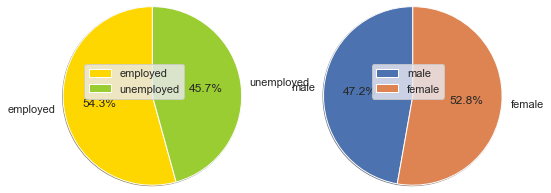

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import seaborn as sns

fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=2.5, hspace=0.1)

colors_list1 = ['gold', 'yellowgreen']
colors_list2 = ['green', 'purple']

explode_list = [0, 0] # ratio for each continent with which to offset each wedge.

df_Job.plot(kind='pie',
            autopct='%1.1f%%',
            figsize=(25, 25),
            radius = 3.0,
            startangle=90,    
            shadow=True,       
            labels=df_Job.index,  # turn off labels on pie chart
            colors=colors_list1,  # add custom colors
            explode=explode_list, # 'explode' lowest 3 continents
            ax = ax0, subplots = True)

df_sex.plot(kind='pie',
            autopct='%1.1f%%',
            figsize=(25, 25),
            radius = 3.0,
            startangle=90,    
            shadow=True,
            labels=df_sex.index,  # turn off labels on pie chart 
            explode=explode_list, # 'explode' lowest 3 continents
            ax = ax1, subplots = True)


plt.show()

#### Keynote observation

Based on the statistics of population and income of Manhanttan community, the borough is a good investment hub

## Location Mapping 

#### To get cordinates of the three universities

In [21]:
# To get the cordinates of New York University
address = 'New York University, New York, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
df = pd.DataFrame({"latitude":latitude,'longitude':longitude}, index =[1])  
for NY_lat, NY_long in zip(df["latitude"], df['longitude']):
    print('New York University Coordinates are: {}, {}.'.format(NY_lat, NY_long))


address = 'City college, New York, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
df = pd.DataFrame({"latitude":latitude,'longitude':longitude}, index =[1])
for CY_lat, CY_long in zip(df["latitude"], df['longitude']):
    print('City University Coordinates are: {}, {}.'.format(CY_lat,CY_long))

address = 'Columbia University, New York, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
df = pd.DataFrame({"latitude":latitude,'longitude':longitude}, index =[1])
for CA_lat, CA_long in zip(df["latitude"], df['longitude']):
    print('Columbia University Coordinates are: {}, {}.'.format(CA_lat, CA_long))

New York University Coordinates are: 40.72925325, -73.99625393609625.
City University Coordinates are: 40.81819805, -73.95100897933364.
Columbia University Coordinates are: 40.8077627, -73.96164061324416.


#### To get the Mahanttan Location cordinates

In [22]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
df = pd.DataFrame({"latitude":latitude,'longitude':longitude}, index =[1])
for Mah_lat, Mah_long in zip(df["latitude"], df['longitude']):
    print('The geograpical coordinate of Manhattan are {}, {}.'.format(Mah_lat, Mah_long))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


### To Create Folium Map of the Three Univeristies and the adjoining bookshops located at radius of 20,000 meters

In [23]:
# To get the cordinates of new york univeristy
mahanttan_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around Mahanttan Borough

# add a red circle marker to represent the City University
folium.CircleMarker(
    [NY_lat, NY_long],
    radius=12,
    color='red',
    popup='Columbia Univeristy',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(mahanttan_map)

# add a red circle marker to represent the City University
folium.CircleMarker(
    [CY_lat, CY_long],
    radius=12,
    color='red',
    popup='City Univeristy',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(mahanttan_map)

# add a red circle marker to represent the Columbia University 
folium.CircleMarker(
    [CA_lat, CA_long],
    radius=12,
    color='red',
    popup='Columbia Unoversity',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(mahanttan_map)

# add the bookshops close to Columbia Univeristy
for lat, lng, label in zip(dfCA_filtered.Latitude, dfCA_filtered.Longitude, dfCA_filtered.Categories):
    folium.CircleMarker(
        [CA_lat, CA_long],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mahanttan_map)

# add the bookshops around the city university
for lat, lng, label in zip(dfCY_filtered.Latitude, dfCY_filtered.Longitude, dfCY_filtered.Categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mahanttan_map)
    
    
# add the bookshops near New York University as blue circle markers
for lat, lng, label in zip(dfNY_filtered.Latitude, dfNY_filtered.Longitude, dfNY_filtered.Categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mahanttan_map)

# display map
mahanttan_map

#### Explanation of the plot

1. The blue markers represent the bookshops
2. The reed markers are the three universities, all loctaed in Mahanttan Borough in New York City. 
3. The columbia university and city college are located at close promximity. The city univeristy has more population than the other 
   two universities but has 25 different campus. 
4. Most of the bookshops are located downtown.  
5. More bookshops are accessible to the columbia university than city college 

There are more bookshops are new York university then in city university and Columbia unversity. City university has highest 
population of students. Therefore considering the population of low population of students and high number of bookshops around 
new york univeristy, it is proper to investigate activities around the city where this university is hosted

## Neighborhood Data of New York State

In [24]:
new_york_data = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json"
print('Data downloaded!')

Data downloaded!


Of the three univeristies, only city university has 25 campuses scattered at different location in New York. The 25 cmapus cover the entire 5 boroughs in new york city and therefore the need to map there location. The campus of the Columbia university and New York University are located in a single borough and are not really scatter, so no need to create folium maps of these cities.

#### Neighbourhood data around New York

In [25]:
# The get request to get the results 
results = requests.get(new_york_data).json()
neighborhoods_data = results['features']
neighborhoods_data

[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

#### Information on the different campuses of the three universities

In [26]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True) 


print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)
print("The borough names are: ", neighborhoods['Borough'].unique())
print("The  campuses of New York University is located in ",neighborhoods['Borough'].unique()[1], "and",neighborhoods['Borough'].unique()[2])
print("11 campus of City University is located in",neighborhoods['Borough'].unique()[1],"and the remaining 14 are spread across the other boroughs" )
print("The Columbia University is located in the borough of ", neighborhoods['Borough'].unique()[1])

The dataframe has 5 boroughs and 306 neighborhoods.
The borough names are:  ['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']
The  campuses of New York University is located in  Manhattan and Brooklyn
11 campus of City University is located in Manhattan and the remaining 14 are spread across the other boroughs
The Columbia University is located in the borough of  Manhattan


#### Number of neighborhood in each of the borough

In [27]:
mahanttan = neighborhoods[neighborhoods['Borough']== "Manhattan"]
print("The number of neighbourhoods in Manhantan are: ", len(mahanttan))
Bronx = neighborhoods[neighborhoods['Borough']== 'Bronx']
print("The number of neighbourhoods in Bronx are: ", len(Bronx))
Brooklyn = neighborhoods[neighborhoods['Borough']== 'Brooklyn']
print("The number of neighbourhoods in Brooklyn are: ", len(Brooklyn))
Queens = neighborhoods[neighborhoods['Borough']== 'Queens']
print("The number of neighbourhoods in Queens are: ", len(Queens))
Staten_Island = neighborhoods[neighborhoods['Borough']== 'Staten Island']
print("The number of neighbourhoods in Staten Island are: ", len(Staten_Island))

The number of neighbourhoods in Manhantan are:  40
The number of neighbourhoods in Bronx are:  52
The number of neighbourhoods in Brooklyn are:  70
The number of neighbourhoods in Queens are:  81
The number of neighbourhoods in Staten Island are:  63


#### Getting the coordinates of locations of campuses City University

#### Getting coordinates and college name of the campuses of City Univeristy

The table below shows the names and cordinates of the 25 diffeent campus of city univeristy. Inofrmation was obtained from online source


In [47]:
Latitude = [40.74019335, 40.7172487, 40.857684649999996, 40.63175995, 40.60758, 40.7553245, 
            42.70965401010101, 40.8073215, 40.754875, 40.746246, 40.7483872, 40.752949,
            40.8180719, 40.7683107, 40.7710723, 40.578191849999996, 40.7438487, 40.8722825, 
            40.7740627, 40.6662941, 40.6952788, 40.7359546, 40.81819805, 40.7017824]

longtitude = [-73.98332973364073, -74.0121804, -73.91289615614554, -73.95348121612278, -74.159282,- 73.9889879,  
              -73.71083494949495, -73.9439667, -73.9817101,-73.942895, -73.990094, -73.9840106, -73.9268413875, 
              -73.9644059567109, -73.9888429,  -73.93496554856793, -73.935166587143,  
              -73.8948917141949, -73.98005097388125, -73.95836331384717, -73.9873073, -73.81588506522962, 
              -73.95100897933364, -73.7952695]

College_name = ['Baruch College', 'Borough of Manhattan Community College','Bronx community college', 'Brookyln College','College of Staten Island',
               'Craig Newmark Graduate School of Journalism', 'CUNY graduate Center','CUNY Graduate School of public Health and Health Policy', 
                'CUNY School of labor and Urban Studies', 'CUNY School of Law', 'CUNY School of Professional Studies','Guttman Community College',
               'Hostos Community College', 'Hunter College', 'John Jay College of Criminal Justice', 'Kingsborough Community College',
               'LaGuardia Community College', 'Lehman College', 'Macaulay Honors College', 'Medgar Ever College', 'Queen College', 
               'Queensborough Community College', 'The City College of New York', 'York College']
df_college = pd.DataFrame({'College Name': College_name, 'Latitude': Latitude, 'Longitude': longtitude})
df_college

,College Name,Latitude,Longitude
0,Baruch College,40.740193,-73.983330
1,Borough of Manhattan Community College,40.717249,-74.012180
2,Bronx community college,40.857685,-73.912896
3,Brookyln College,40.631760,-73.953481
4,College of Staten Island,40.607580,-74.159282
5,Craig Newmark Graduate School of Journalism,40.755325,-73.988988
6,CUNY graduate Center,42.709654,-73.710835
7,CUNY Graduate School of public Health and Heal...,40.807322,-73.943967
8,CUNY School of labor and Urban Studies,40.754875,-73.981710
9,CUNY School of Law,40.746246,-73.942895


#### To get the coordinate of city university used for mapping purpose

In [48]:
# To get the cordinates of New York University
address = 'New York University, New York, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
df = pd.DataFrame({"latitude":latitude,'longitude':longitude}, index =[1])  
for NY_lat, NY_long in zip(df["latitude"], df['longitude']):
    print('New York University Coordinates are: {}, {}.'.format(NY_lat, NY_long))


address = 'City college, New York, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
df = pd.DataFrame({"latitude":latitude,'longitude':longitude}, index =[1])
for CY_lat, CY_long in zip(df["latitude"], df['longitude']):
    print('City University Coordinates are: {}, {}.'.format(CY_lat,CY_long))

address = 'Columbia University, New York, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
df = pd.DataFrame({"latitude":latitude,'longitude':longitude}, index =[1])
for CA_lat, CA_long in zip(df["latitude"], df['longitude']):
    print('Columbia University Coordinates are: {}, {}.'.format(CA_lat, CA_long))

New York University Coordinates are: 40.72925325, -73.99625393609625.
City University Coordinates are: 40.81819805, -73.95100897933364.
Columbia University Coordinates are: 40.8077627, -73.96164061324416.


#### The location of the 25 campuses of City University New York

In [49]:
# create map of New York using latitude and longitude values
City_Map = folium.Map(location=[CY_lat, CY_long], zoom_start=10)

# add a red circle marker to represent the City University 
folium.CircleMarker(
    [CY_lat, CY_long],
    radius=12,
    color='red',
    popup='City Univeristy',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(City_Map)


# add markers to map
for lat, lng, neighborhood in zip(df_college['Latitude'], df_college['Longitude'], df_college['College Name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(City_Map)  
    
City_Map

The 25 campuses of City University New York, USA are located at different locations from the university center and therefore the need to determine which of the location is best for a bookshop. 

Sinec all three campuses have location in Manhanttan borough is best to map and explore neigborhood around mahanttan and then cluster these neighboorhood in relation to the three univeristies. Therefore two clusters will be creates:
1. Clusters of mahanttan neighboorhood in relation to the three iuniveristies centers 
2. Clusters of City Univeristy campuses in relation to the neighboorhood of Mahanttan. 

### Folium map of mahanttan neighboorhood in relation to the location of the three universities and the different universities campuses

#### To get the cordinates and neighbohood of Mahanttan

In [50]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [51]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
df = pd.DataFrame({"latitude":latitude,'longitude':longitude}, index =[1])
for Mah_lat, Mah_long in zip(df["latitude"], df['longitude']):
    print('The geograpical coordinate of Manhattan are {}, {}.'.format(Mah_lat, Mah_long))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [52]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[Mah_lat, Mah_long], zoom_start=11)

# add a red circle marker to represent the City University 
folium.CircleMarker(
    [CY_lat, CY_long],
    radius=12,
    color='red',
    popup='City Univeristy',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(map_manhattan)

# add a red circle marker to represent the New York University 
folium.CircleMarker(
    [NY_lat, NY_long],
    radius=12,
    color='red',
    popup='City Univeristy',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(map_manhattan)

# add a red circle marker to represent the New York University 
folium.CircleMarker(
    [CA_lat, CA_long],
    radius=12,
    color='red',
    popup='Columbia University',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(map_manhattan)

# add markers to map the different neighbohod in Mahanttan
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  

# add markers to map the different city colleges in Mahanttan
for lat, lng, neighborhood in zip(df_college['Latitude'], df_college['Longitude'], df_college['College Name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)
    
map_manhattan

### ANALYSIS OF FOLIUM MAP THAT SHOWS UNIVERSITIES CENTERS & CAMPUSES, AND NEIGHBORHOODS IN NEW YORK

#### The Analysis

1. The red colors are the centers of the three universities. 
2. The green markers represent the campuses of city universities. As shown in the map, the campuses are spreed beyond the Mahanttan
   neighborhood to other boroughs in New York.
3. The purple markers are the Mahanttan neighborhood. 
4. The three universities are locataed in the Mahnattan district. 
5. City and Columbia universities are located close to each other, and new york university is located downtown
6. Majority of the City university campuses are located in the Manhantan borough, and the other in the other boroughs in new York
7. There is the need to determine the population density around the Manhanttan borough and the student population contribution from the different univeristies
6. Therefore the two option to locate the proposed bookshop is (a) Neighborhood of Manhattan and (b) in any other boroughs where city university campuses are located

### To Map the location of the different bookshops and the campuses of the three different univeristies

In [53]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[Mah_lat, Mah_long], zoom_start=11)

# add a red circle marker to represent the City University 
folium.CircleMarker(
    [CY_lat, CY_long],
    radius=12,
    color='red',
    popup='City Univeristy',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(map_manhattan)

# add a red circle marker to represent the New York University 
folium.CircleMarker(
    [NY_lat, NY_long],
    radius=12,
    color='red',
    popup='City Univeristy',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(map_manhattan)

# add a red circle marker to represent the Columbia University 
folium.CircleMarker(
    [CA_lat, CA_long],
    radius=12,
    color='red',
    popup='Columbia Unoversity',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(map_manhattan)

# add the bookshops near New York University as blue circle markers
for lat, lng, label in zip(dfNY_filtered.Latitude, dfNY_filtered.Longitude, dfNY_filtered.Categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_manhattan)

# add Bookshops near City University as green circle markers
for lat, lng, label in zip(dfCY_filtered.Latitude, dfCY_filtered.Longitude, dfCY_filtered.Categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_manhattan)
    
# add the Bookshops near Columbia Univeristy as magenta circle markers
for lat, lng, label in zip(dfCA_filtered.Latitude, dfCA_filtered.Longitude, dfCA_filtered.Categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_manhattan)
    
# add markers to map the different city colleges in Mahanttan
for lat, lng, neighborhood in zip(df_college['Latitude'], df_college['Longitude'], df_college['College Name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)

map_manhattan

### The Explore the vicinity of Neighborhood of New York University located in Greenwhich Village

#### The coordinates of Greenwhich Village

In [54]:
Neighborhood, lat, lon = manhattan_data.loc[18, ['Neighborhood','Latitude', 'Longitude']]
print('Latitude and longitude values of {} are {}, {}.'.format(Neighborhood, 
                                                               lon, 
                                                               lat))

Latitude and longitude values of Greenwich Village are -73.99991402945902, 40.72693288536128.


#### The Analysis

1. The red marker are the three universities
2. The blue markers are bookshops around the three different universities at radius of 20000
3. The green markers are the campuses of of the different universities 
4. At radius of 20000 meters, only two bookshops are located outside the circle of the university campuses.
5. Only 3 campuses do not have bookshops at close proximity. 
6. The choice is to find a suitable location with goof combination of cluster of neigbohood and campuses 

### To get get the top venues in Greenwhich village (the neighborhood of New York Univeristy) within a radius of 500 meters

In [55]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lon, 
    radius, 
    LIMIT)

results = requests.get(url).json()
close_venues = pd.json_normalize(results['response']['groups'][0]['items']) 

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =  close_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Vesuvio Bakery,Bakery,40.725970,-74.001248
1,Local,Beer Bar,40.727089,-74.001912
2,Raffetto's,Gourmet Shop,40.728010,-74.001949
3,Terra Blues,Jazz Club,40.728288,-73.999381
4,Carbone,Italian Restaurant,40.727903,-74.000136
...,...,...,...,...
95,Karakatta,Ramen Restaurant,40.729438,-73.998818
96,Bareburger,Burger Joint,40.728276,-73.998218
97,Cafe Wha?,Music Venue,40.730073,-74.000469
98,Quantum Leap,Vegetarian / Vegan Restaurant,40.729209,-73.998867


In [38]:
print('There are {} uniques categories of shops, resturants, bars, clubs, e.t.c in Greenwhich neighborhood.'.format(len(nearby_venues['name'].unique())))

There are 100 uniques categories of shops, resturants, bars, clubs, e.t.c in Greenwhich neighborhood.


In [56]:
# one hot encoding
greenwhich_onehot = pd.get_dummies(nearby_venues[['categories']], prefix="", prefix_sep="")

# 
greenwhich_onehot.insert(0, "categories", nearby_venues['categories'])
greenwhich_onehot.shape

(100, 61)

In [57]:
greenwhich_grouped = greenwhich_onehot.groupby('categories').mean().reset_index()
greenwhich_grouped.shape

(60, 61)

In [41]:
num_top_venues = 5

for hood in greenwhich_grouped['categories']:
    print("----"+hood+"----")
    temp = greenwhich_grouped[greenwhich_grouped['categories'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Accessories Store----
                 venue  freq
0    Accessories Store   1.0
1  American Restaurant   0.0
2    Indian Restaurant   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----American Restaurant----
                 venue  freq
0  American Restaurant   1.0
1    Accessories Store   0.0
2    Indian Restaurant   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----Bagel Shop----
                 venue  freq
0           Bagel Shop   1.0
1    Accessories Store   0.0
2          Record Shop   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----Bakery----
                 venue  freq
0               Bakery   1.0
1    Accessories Store   0.0
2          Record Shop   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----Beer Bar----
                 venue  freq
0             Beer Bar   1.0
1    Accessories Store   0.0
2          Record Shop   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----Boutique---

                venue  freq
0  Seafood Restaurant   1.0
1   Accessories Store   0.0
2    Ramen Restaurant   0.0
3   Indian Restaurant   0.0
4  Italian Restaurant   0.0


----Shoe Store----
                venue  freq
0          Shoe Store   1.0
1   Accessories Store   0.0
2    Ramen Restaurant   0.0
3   Indian Restaurant   0.0
4  Italian Restaurant   0.0


----Snack Place----
                venue  freq
0         Snack Place   1.0
1   Accessories Store   0.0
2    Ramen Restaurant   0.0
3   Indian Restaurant   0.0
4  Italian Restaurant   0.0


----Spa----
                venue  freq
0                 Spa   1.0
1   Accessories Store   0.0
2    Ramen Restaurant   0.0
3   Indian Restaurant   0.0
4  Italian Restaurant   0.0


----Sushi Restaurant----
                venue  freq
0    Sushi Restaurant   1.0
1   Accessories Store   0.0
2    Ramen Restaurant   0.0
3   Indian Restaurant   0.0
4  Italian Restaurant   0.0


----Tapas Restaurant----
                venue  freq
0    Tapas Restaurant

In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['categories']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['categories'] = greenwhich_grouped['categories']

for ind in np.arange(greenwhich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(greenwhich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Accessories Store,Accessories Store,American Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue
1,American Restaurant,American Restaurant,Accessories Store,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue
2,Bagel Shop,Bagel Shop,Accessories Store,Record Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue
3,Bakery,Bakery,Accessories Store,Record Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue
4,Beer Bar,Beer Bar,Accessories Store,Record Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue


In [60]:
# set number of clusters
kclusters = 5

greenwhich_grouped_clustering = greenwhich_grouped.drop('categories', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(greenwhich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0])

In [61]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = nearby_venues

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('categories'), on='categories')

manhattan_merged # check the last columns!

,name,categories,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Vesuvio Bakery,Bakery,40.725970,-74.001248,0,Bakery,Accessories Store,Record Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue
1,Local,Beer Bar,40.727089,-74.001912,0,Beer Bar,Accessories Store,Record Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue
2,Raffetto's,Gourmet Shop,40.728010,-74.001949,4,Gourmet Shop,Accessories Store,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue
3,Terra Blues,Jazz Club,40.728288,-73.999381,0,Jazz Club,Accessories Store,American Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue
4,Carbone,Italian Restaurant,40.727903,-74.000136,0,Italian Restaurant,Accessories Store,American Restaurant,Indian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Karakatta,Ramen Restaurant,40.729438,-73.998818,0,Ramen Restaurant,Accessories Store,American Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant
96,Bareburger,Burger Joint,40.728276,-73.998218,0,Burger Joint,Accessories Store,Record Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue
97,Cafe Wha?,Music Venue,40.730073,-74.000469,0,Music Venue,Accessories Store,American Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant
98,Quantum Leap,Vegetarian / Vegan Restaurant,40.729209,-73.998867,0,Vegetarian / Vegan Restaurant,Accessories Store,Ramen Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant


In [62]:
# create map
map_clusters = folium.Map(location=[lat, lon], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['lat'], manhattan_merged['lng'], manhattan_merged['categories'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters